### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

### Load the Dataset

In [2]:
house_data = pd.read_csv("House_price_data.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Cleaning

In [3]:
house_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [4]:
house_data_nadrop = house_data.dropna(axis=1)
house_data_nadrop.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [5]:
house_data_nadrop.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
                  ...  
CentralAir       object
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr    

In [6]:
house_data_nadrop = house_data_nadrop.select_dtypes(exclude=['object'])

### Prepare the data for modelling

In [7]:
target = house_data_nadrop['SalePrice']
features = house_data_nadrop.drop('SalePrice', axis = 1)
features = features.drop(['Id'], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

### Data modelling

In [9]:
regressor_model = LinearRegression()
regressor_model.fit(X_train, y_train)
y_pred = regressor_model.predict(X_test)

### Accuracy of the model

In [10]:
r2_score(y_test, y_pred)

0.8232260146339857

### Check the correlation between the features

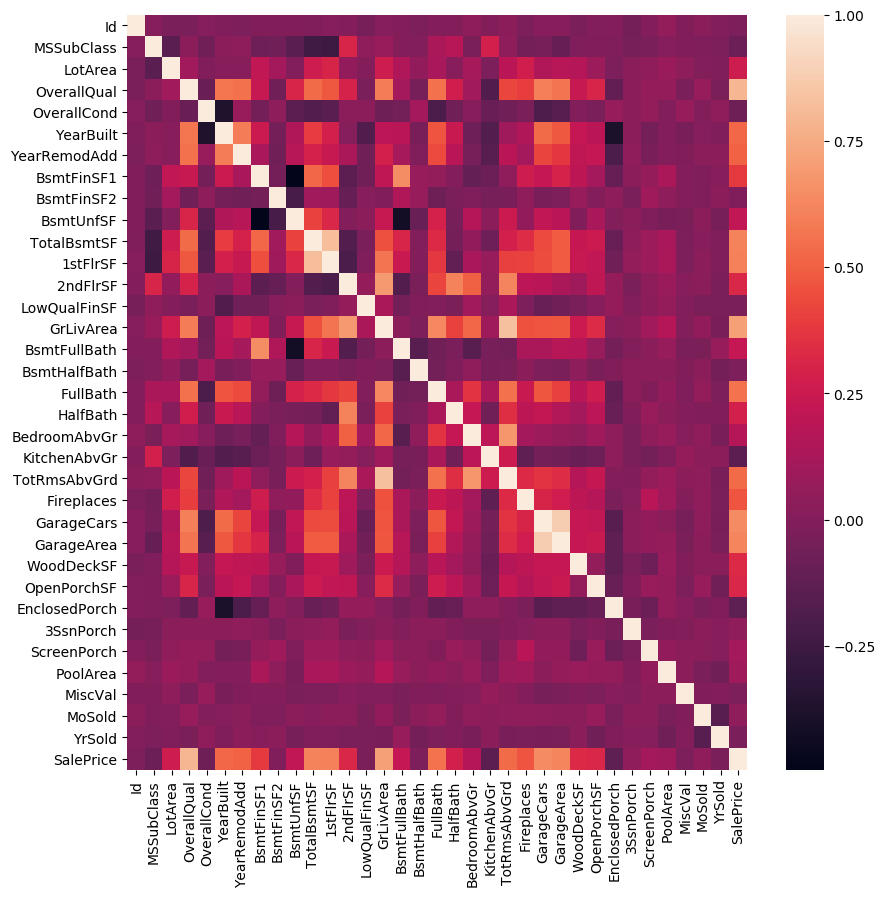

In [11]:
plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(house_data_nadrop.corr())

### Predict using only the features with a higher correlation

In [12]:
target = house_data_nadrop['SalePrice']
features = house_data_nadrop[['GrLivArea', '1stFlrSF', 'YearBuilt', 'OverallQual']].copy()
features.head()

,GrLivArea,1stFlrSF,YearBuilt,OverallQual
0,1710,856,2003,7
1,1262,1262,1976,6
2,1786,920,2001,7
3,1717,961,1915,7
4,2198,1145,2000,8


In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [14]:
regressor_model = LinearRegression()
regressor_model.fit(X_train, y_train)
y_pred = regressor_model.predict(X_test)

In [15]:
r2_score(y_test, y_pred)

0.7790700122752136